In [12]:
import pandas as pd                  # For data loading and manipulation
import numpy as np                   # For numerical operations
import matplotlib.pyplot as plt      # For data visualization
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler      # For scaling data
from sklearn.linear_model import LinearRegression     # For linear regression
from sklearn.tree import DecisionTreeClassifier       # For decision tree classification
from sklearn.ensemble import RandomForestClassifier   # For random forest classification
from sklearn.metrics import accuracy_score            # For calculating accuracy score


In [4]:
import pandas as pd

# Read the dataset into a DataFrame
bc_data = pd.read_csv("datasets/breast-cancer-wisconsin.data", 
                      header=None, 
                      sep=",")

# Modify the column names
bc_data.columns = ["sample_code_number", 
                   "clump_thickness", 
                   "uniformity_of_cell_size", 
                   "uniformity_of_cell_shape", 
                   "marginal_adhesion", 
                   "single_epithelial_cell_size", 
                   "bare_nuclei", 
                   "bland_chromatin", 
                   "normal_nucleoli", 
                   "mitosis", 
                   "classes"]

# Modify the classes column
bc_data["classes"] = bc_data["classes"].replace({2: "benign", 4: "malignant"})


In [6]:
bc_data.head()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,classes
0,1000025,5,1,1,1,2,1,3,1,1,benign
1,1002945,5,4,4,5,7,10,3,2,1,benign
2,1015425,3,1,1,1,2,2,3,1,1,benign
3,1016277,6,8,8,1,3,4,3,7,1,benign
4,1017023,4,1,1,3,2,1,3,1,1,benign


In [9]:
#Dropping missing values
bc_data.dropna(axis=1)
#Checking if there are any missing values left
bc_data.isnull()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,classes
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False


Trying out various EDA tools

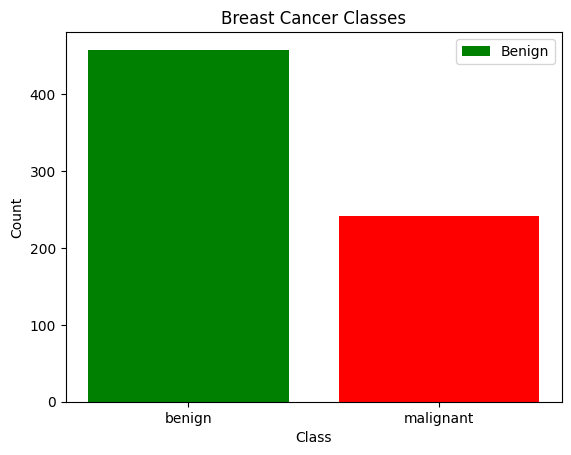

In [21]:
# Get the value counts for each class
class_counts = bc_data['classes'].value_counts()

# Create the bar graph
plt.bar(class_counts.index, class_counts, color=['green', 'red'])


# Add labels and title
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Breast Cancer Classes")

plt.legend(labels=['Benign', 'Malignant'])

# Show the graph

plt.savefig("images/bar_graph_distribution.png")
plt.show()

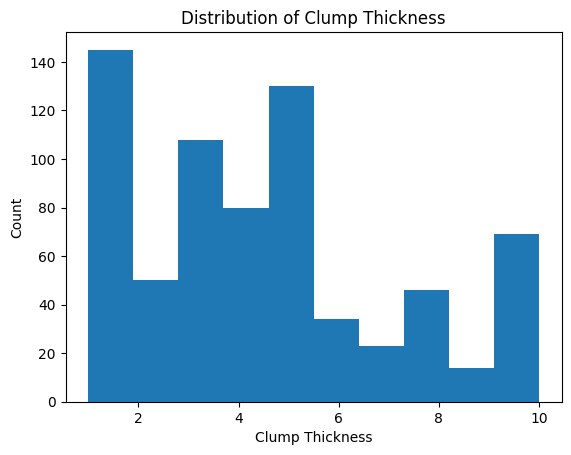

In [22]:
#Plotting Histogram

plt.hist(bc_data["clump_thickness"], bins = 10)

# Add labels and title
plt.xlabel("Clump Thickness")
plt.ylabel("Count")
plt.title("Distribution of Clump Thickness")

plt.savefig("images/distribution_clump_thickness.png")
plt.show()